# 0.0 IMPORTS

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.core.display  import HTML


## 0.1 Loading Data

In [43]:
df_raw = pd.read_csv('../data/processed/Absenteeism_at_work.csv', sep=';')

## 0.2 Helper Functions

In [73]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

In [74]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0 DATA DESCRIPTION

In [44]:
df1 = df_raw

## 1.1 Rename Columns

In [52]:
#rename
df1.columns = df1.columns.str.replace(' ','_').str.lower()

In [53]:
df1.sample()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day_,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
281,15,28,9,6,1,291,31,12,40,294.217,...,0,1,1,1,0,1,73,171,25,4


## 1.2 Data Dimensions

In [54]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 740
Number of Cols: 21


## 1.3 Data Types

In [55]:
df1.dtypes

id                                   int64
reason_for_absence                   int64
month_of_absence                     int64
day_of_the_week                      int64
seasons                              int64
transportation_expense               int64
distance_from_residence_to_work      int64
service_time                         int64
age                                  int64
work_load_average/day_             float64
hit_target                           int64
disciplinary_failure                 int64
education                            int64
son                                  int64
social_drinker                       int64
social_smoker                        int64
pet                                  int64
weight                               int64
height                               int64
body_mass_index                      int64
absenteeism_time_in_hours            int64
dtype: object

### 1.4 Check NA

In [56]:
df1.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day_             0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

## 1.5 Descriptive Statistical

In [57]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.5.1 Numerical Attributes

In [65]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000,36.000,35.000,18.017568,18.000,11.013798,0.016606,-1.251818
1,reason_for_absence,0.000,28.000,28.000,19.216216,23.000,8.427706,-0.915312,-0.259925
2,month_of_absence,0.000,12.000,12.000,6.324324,6.000,3.433964,0.069369,-1.254967
3,day_of_the_week,2.000,6.000,4.000,3.914865,4.000,1.420714,0.102440,-1.286406
4,seasons,1.000,4.000,3.000,2.544595,3.000,1.111080,-0.038532,-1.345190
5,transportation_expense,118.000,388.000,270.000,221.329730,225.000,66.906970,0.396189,-0.318291
6,distance_from_residence_to_work,5.000,52.000,47.000,29.631081,26.000,14.826760,0.312083,-1.261683
7,service_time,1.000,29.000,28.000,12.554054,13.000,4.381910,-0.004720,0.683111
8,age,27.000,58.000,31.000,36.450000,37.000,6.474393,0.697703,0.431613
9,work_load_average/day_,205.917,378.884,172.967,271.490235,264.249,39.031717,0.961457,0.618188


# 2.0 FEATURE ENGINEERING

## 2.1 Hypothesis Mind Map

In [64]:
from IPython import Image
#Image('')

ImportError: cannot import name 'Image' from 'IPython' (c:\users\amd\appdata\local\programs\python\python39\lib\site-packages\IPython\__init__.py)

## List of Hypothesis

**H1.** The most frequency reason for absence is factors influencing health status and contact with health services.

**H2.** The absnce month with highest occurrence of absences is December.

**H3.** The day of the week with the highest occurrence of absences is Monday.

**H4.** The lower the transport expense, the greater the adherence to work.

**H5.** The junior the age, more the absences.

**H6.** The highest education, the greather adherence to work.

**H7.** The highest number of sons, more the absences.

**H8.** Employees who drink socially, plus absences.

**H9.** Employees who smokes socially, plus absences.

**H10.** The highest weight, more the absences.

**H11.** The highest distance from residence to work, more the absences.

## 2.2 Feature Engineering

# 3.0 FILTRAGEM DAS VARIÁVEIS

# 4.0 ANALISE EXPLORATÓRIA DOS DADOS

In [68]:
df2 = df1.copy()

## 4.1 Univariate Analysis

### 4.1.2 Response  Variable

<AxesSubplot:xlabel='absenteeism_time_in_hours', ylabel='Count'>

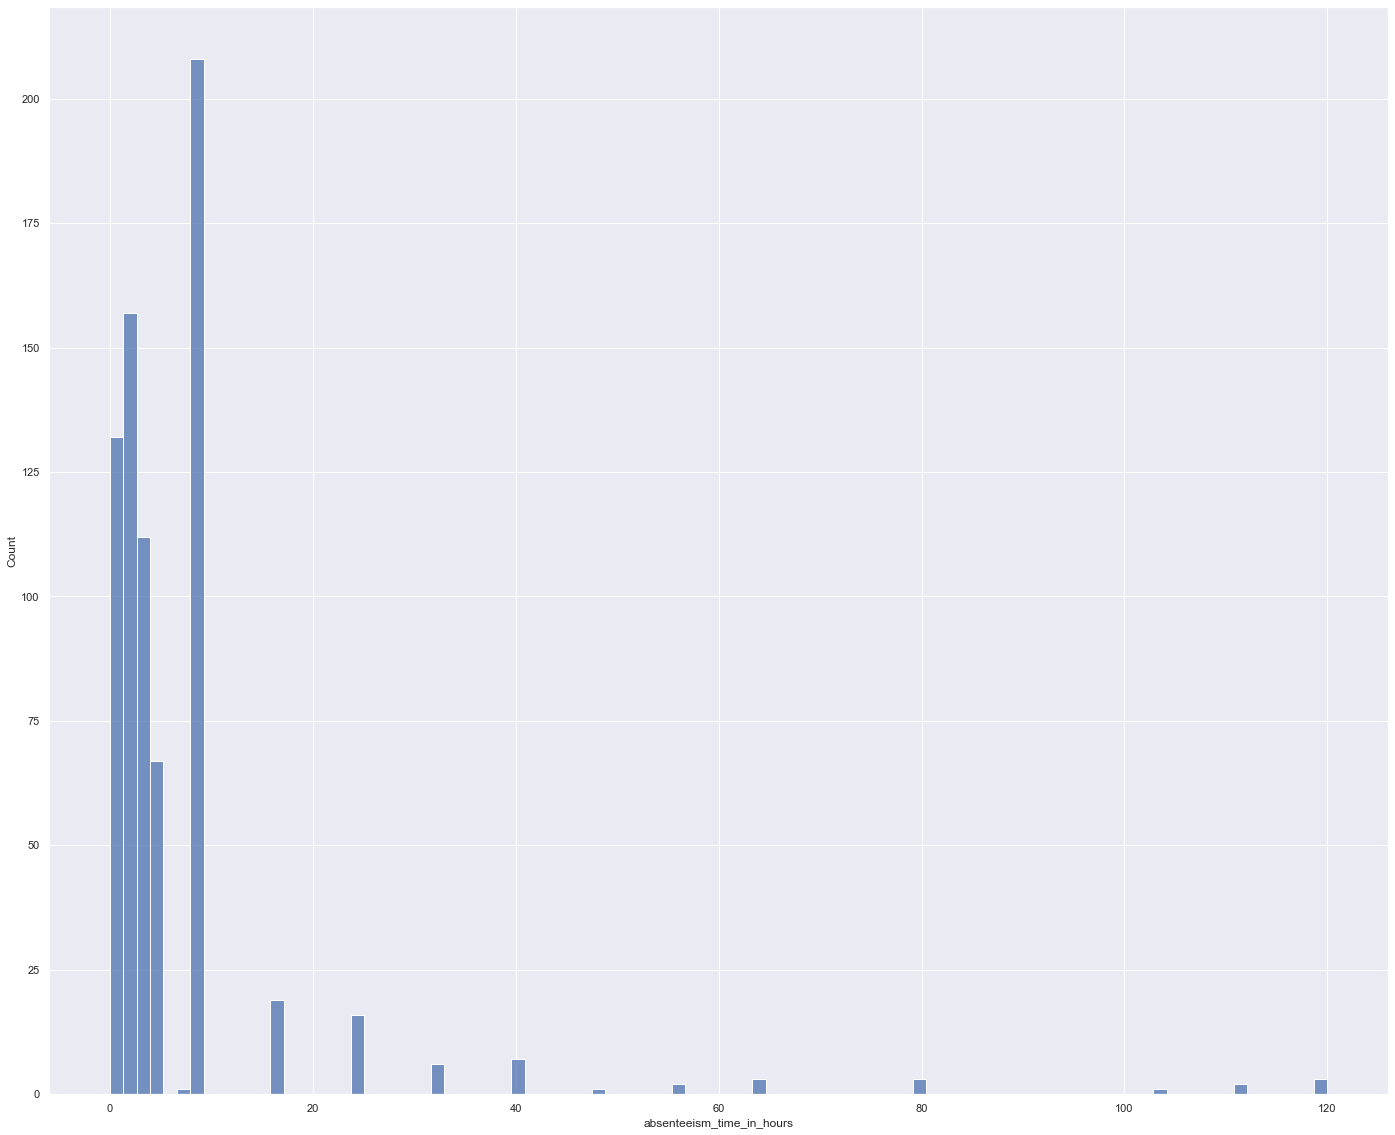

In [75]:
sns.histplot(df1['absenteeism_time_in_hours'])

### 4.1.3 Numerical Variables

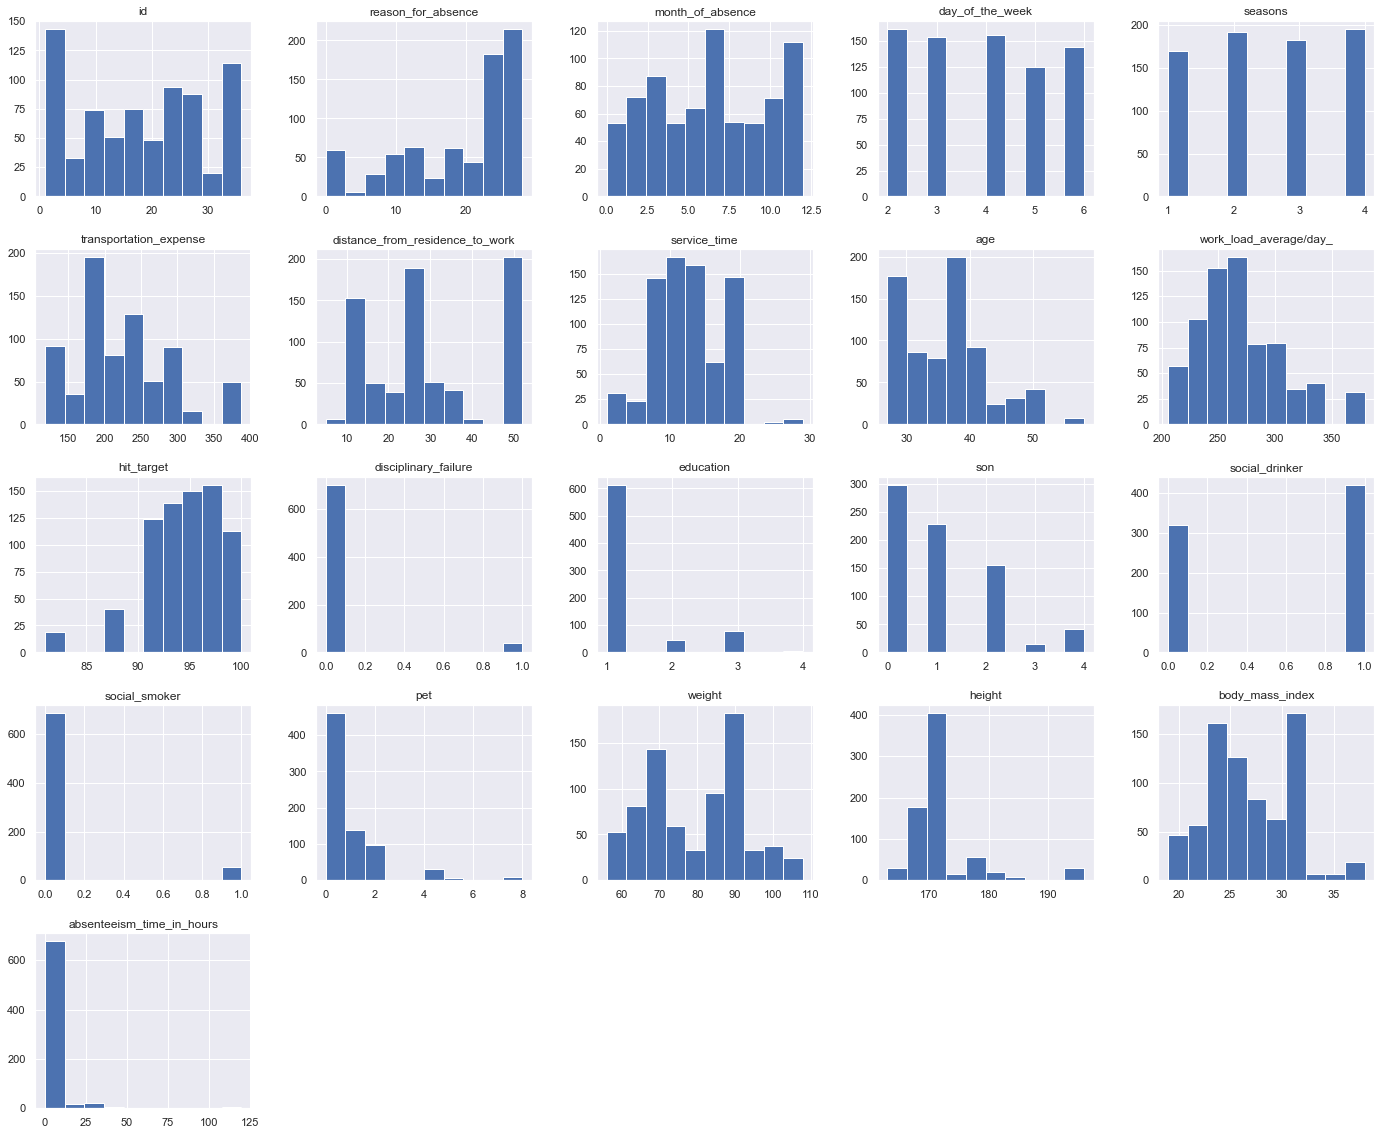

In [76]:
num_attributes.hist();

## 4.2 Bivariate Analysis

### **H1.** The most frequency reason for absence is factors influencing health status and contact with health services.
**FALSE** Diseases of the musculoskeletal system and connective tissue is the most frequency resos for absence.

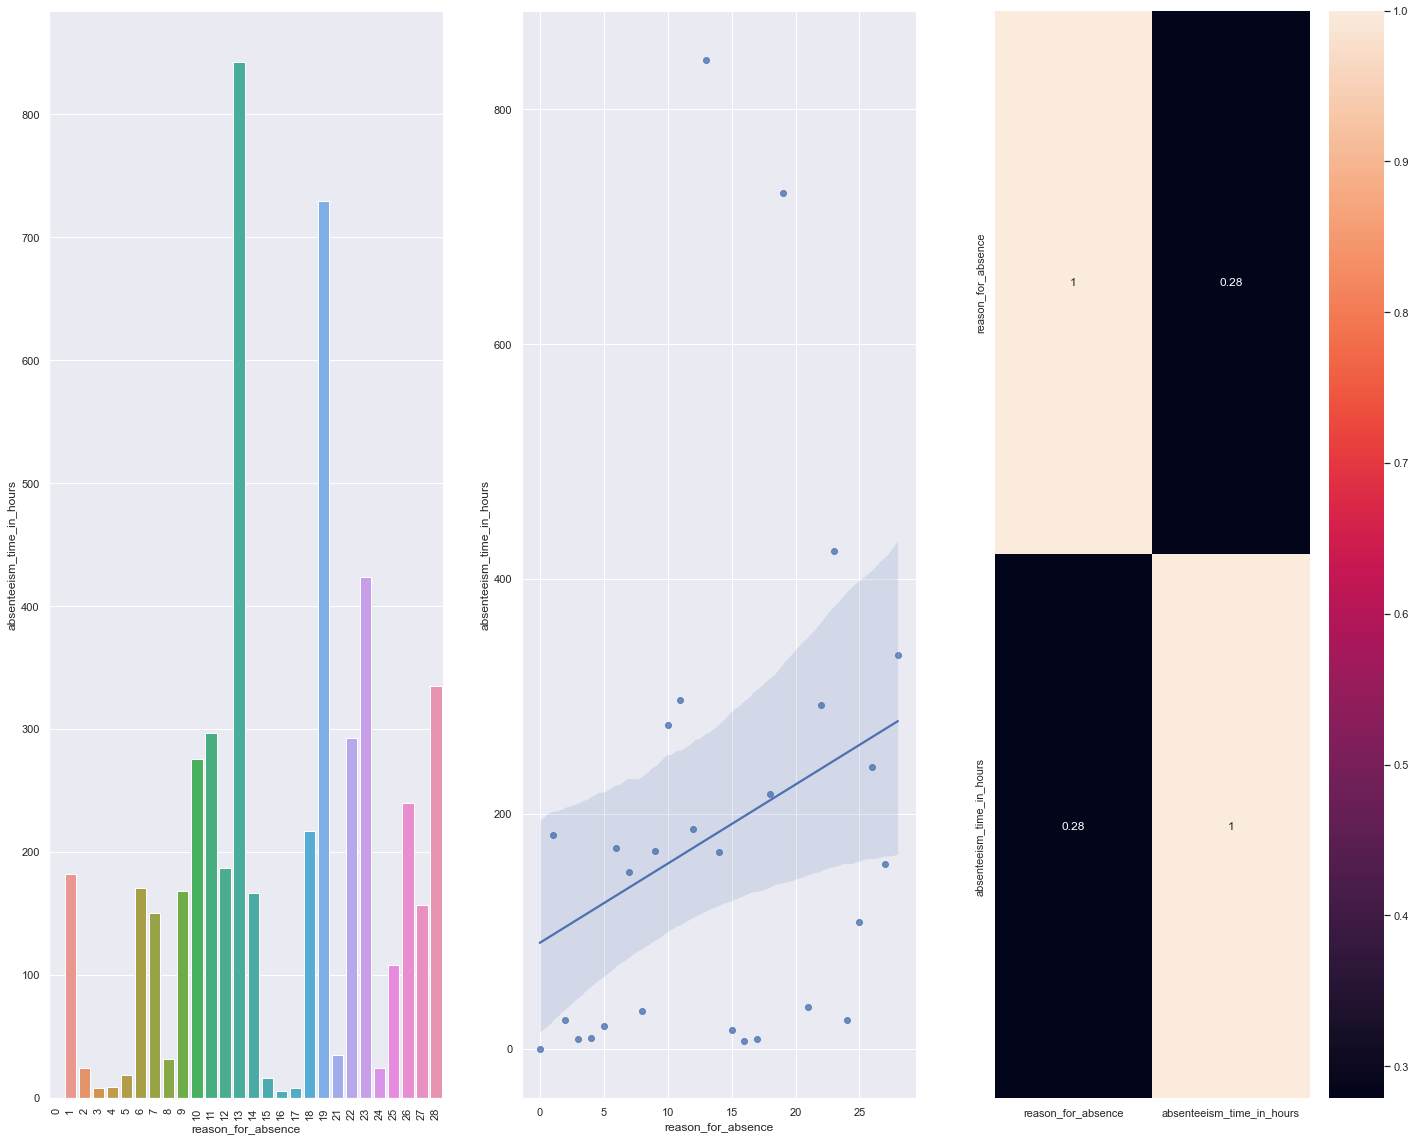

In [87]:
aux1 = df2[['absenteeism_time_in_hours', 'reason_for_absence']].groupby('reason_for_absence').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='reason_for_absence', y='absenteeism_time_in_hours', data=aux1 );
xticks(rotation=90)

plt.subplot( 1, 3, 2 )
sns.regplot( x='reason_for_absence', y='absenteeism_time_in_hours', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H2.** The absnce month with highest occurrence of absences is December.
**FALSE** The absnce month with highest occurrence of absences is March. 

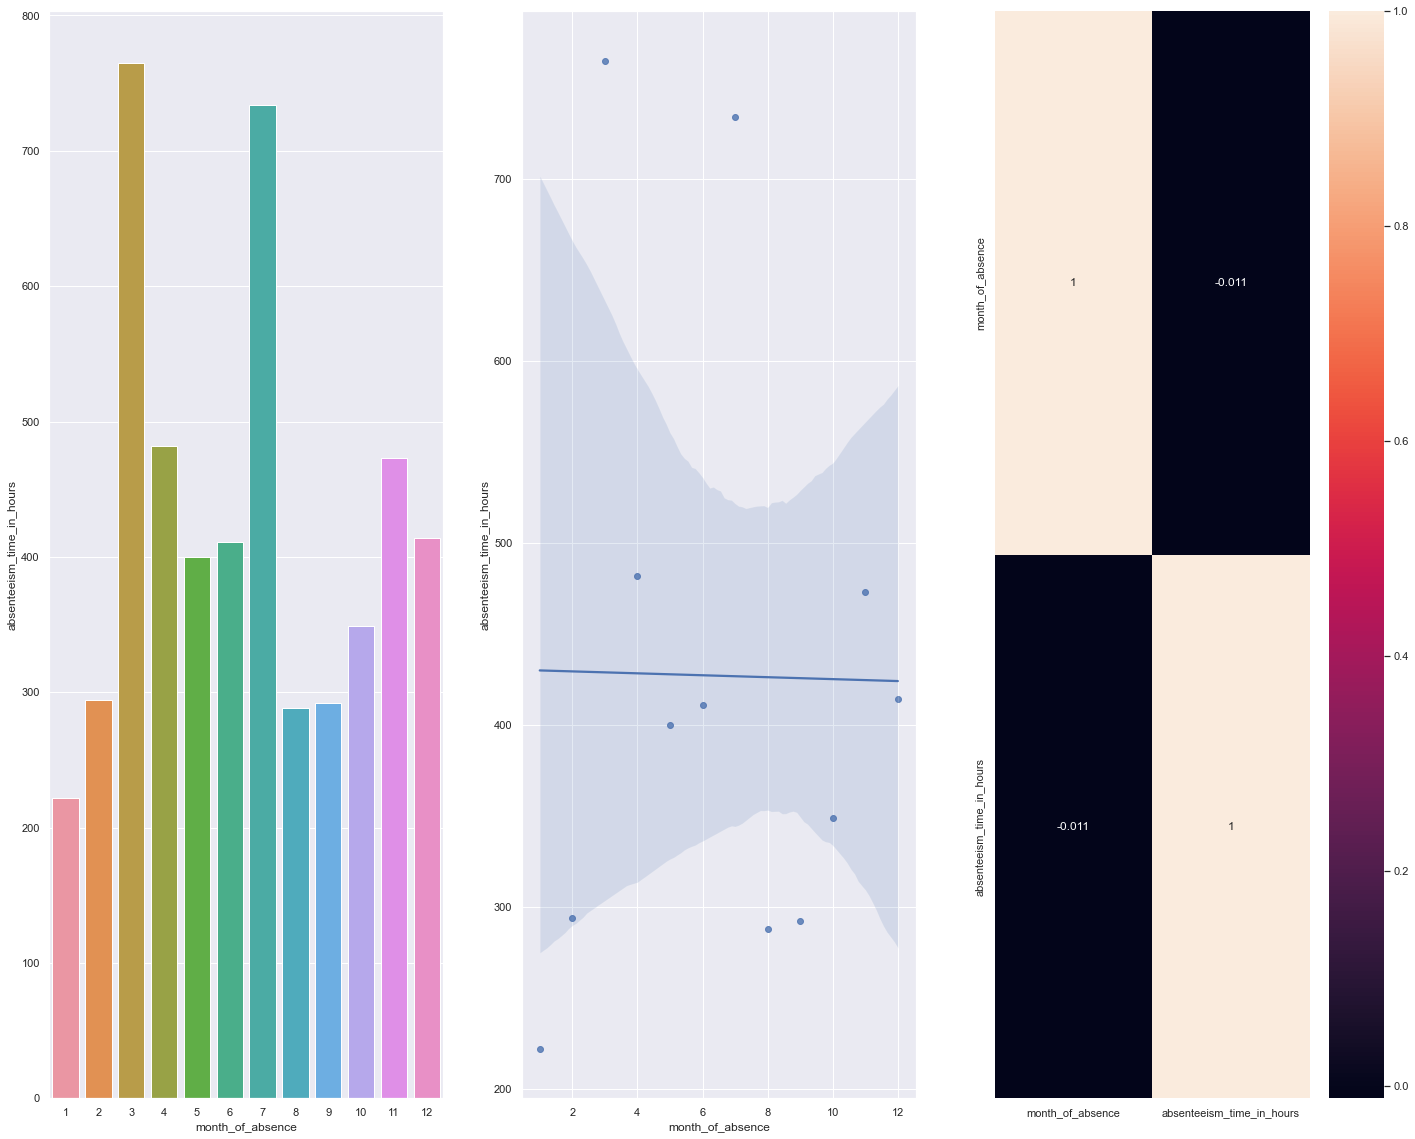

In [98]:
aux1 = df2[['absenteeism_time_in_hours', 'month_of_absence']].query('month_of_absence >0').groupby('month_of_absence').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='month_of_absence', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot( x='month_of_absence', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H3.** The day of the week with the highest occurrence of absences is Monday.
**TRUE** The day of the week with the highest occurrence of absences is Monday.

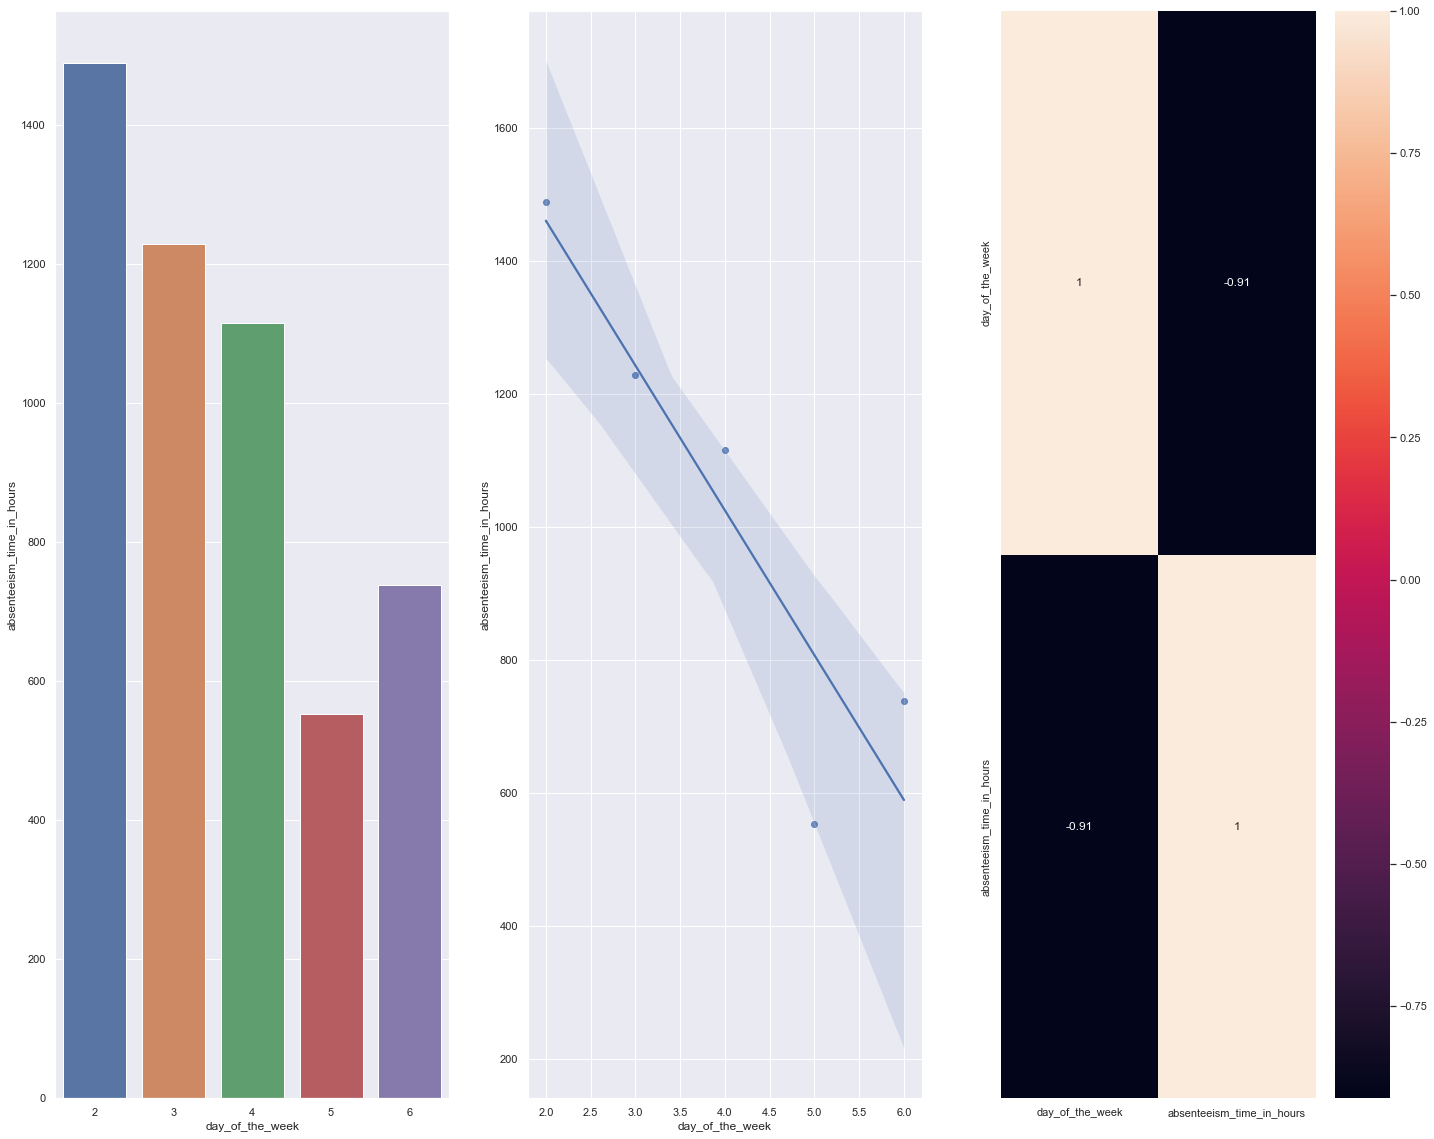

In [104]:
aux1 = df2[['absenteeism_time_in_hours', 'day_of_the_week']].groupby('day_of_the_week').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='day_of_the_week', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot( x='day_of_the_week', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H4.** The lower the transport expense, the greater the adherence to work.
**FALSE** The lower the transport expense, is not greater the adherence to work.

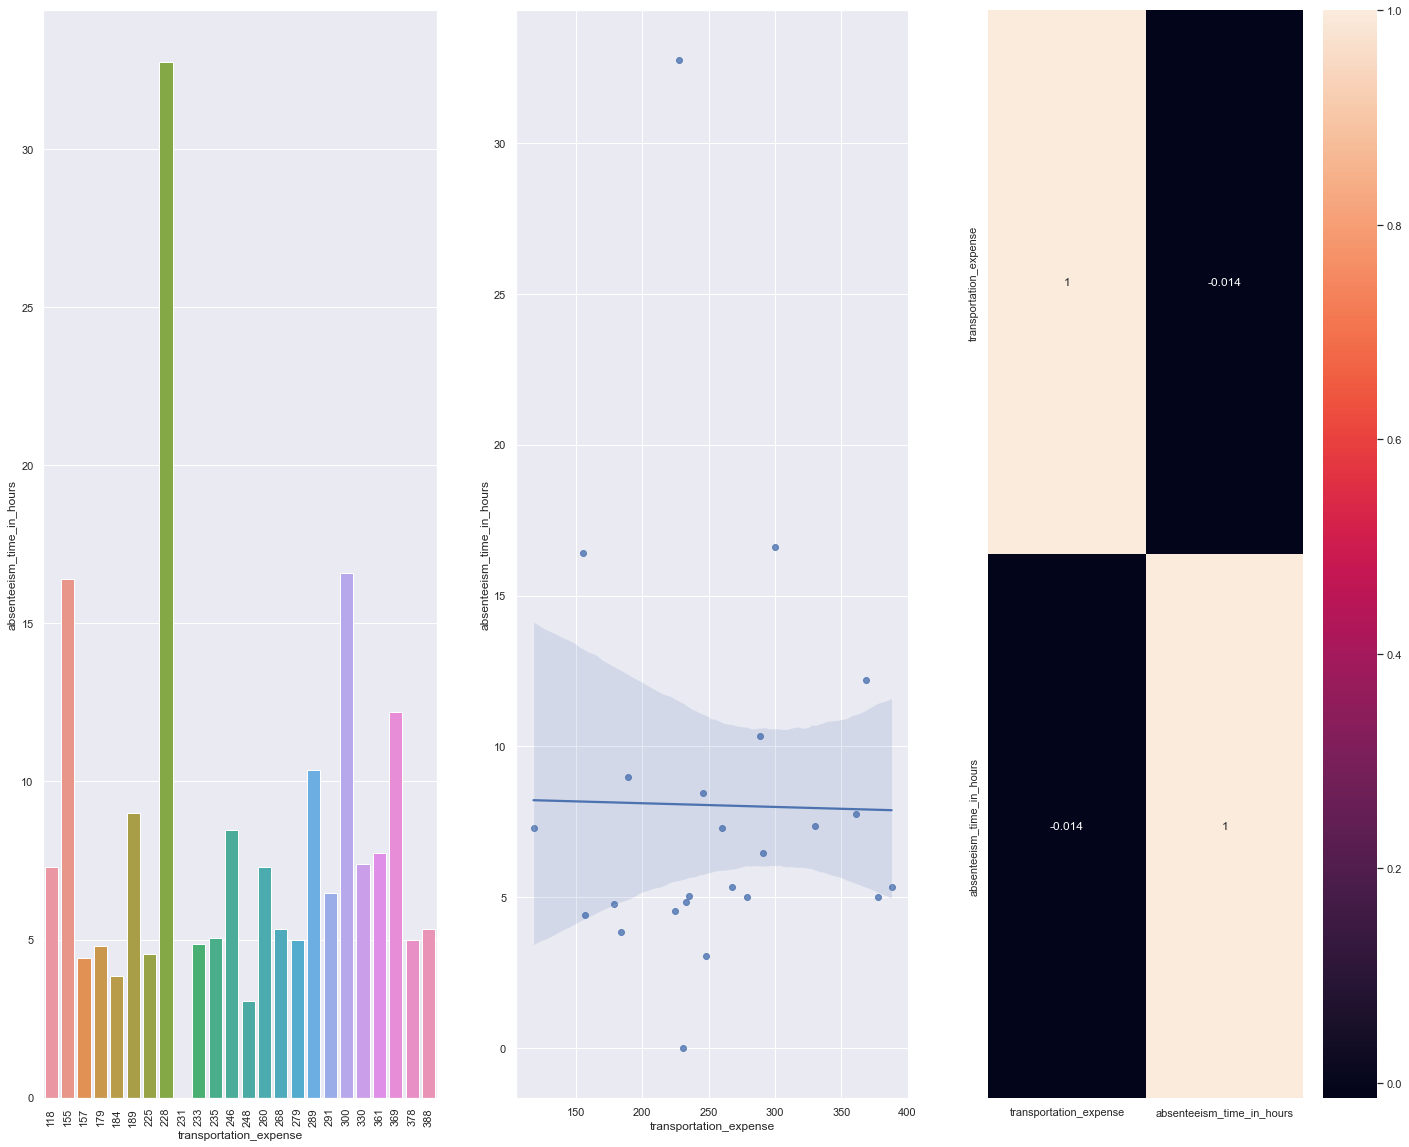

In [110]:
aux1 = df2[['absenteeism_time_in_hours', 'transportation_expense']].groupby('transportation_expense').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='transportation_expense', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='transportation_expense', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H5.** The junior the age, more the absences.
**FALSE** The junior the age, less the absences.

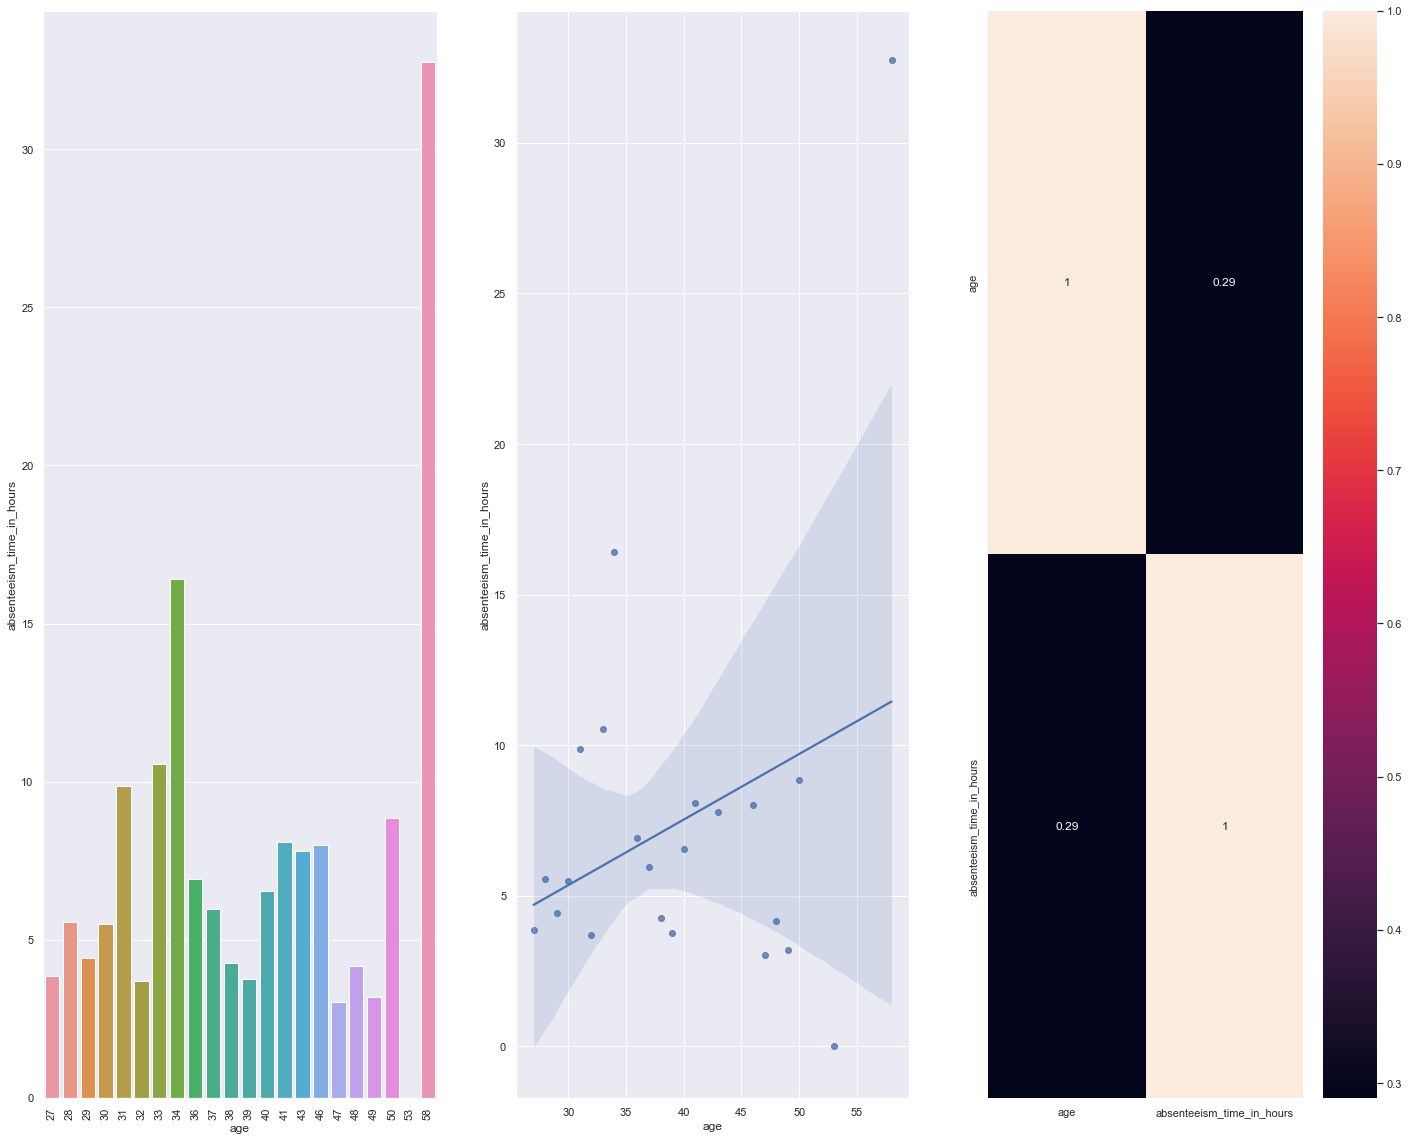

In [115]:
aux1 = df2[['absenteeism_time_in_hours', 'age']].groupby('age').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='age', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='age', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H6.** The highest education, the greather adherence to work.
**FALSE** The highest education, less adherence to work.

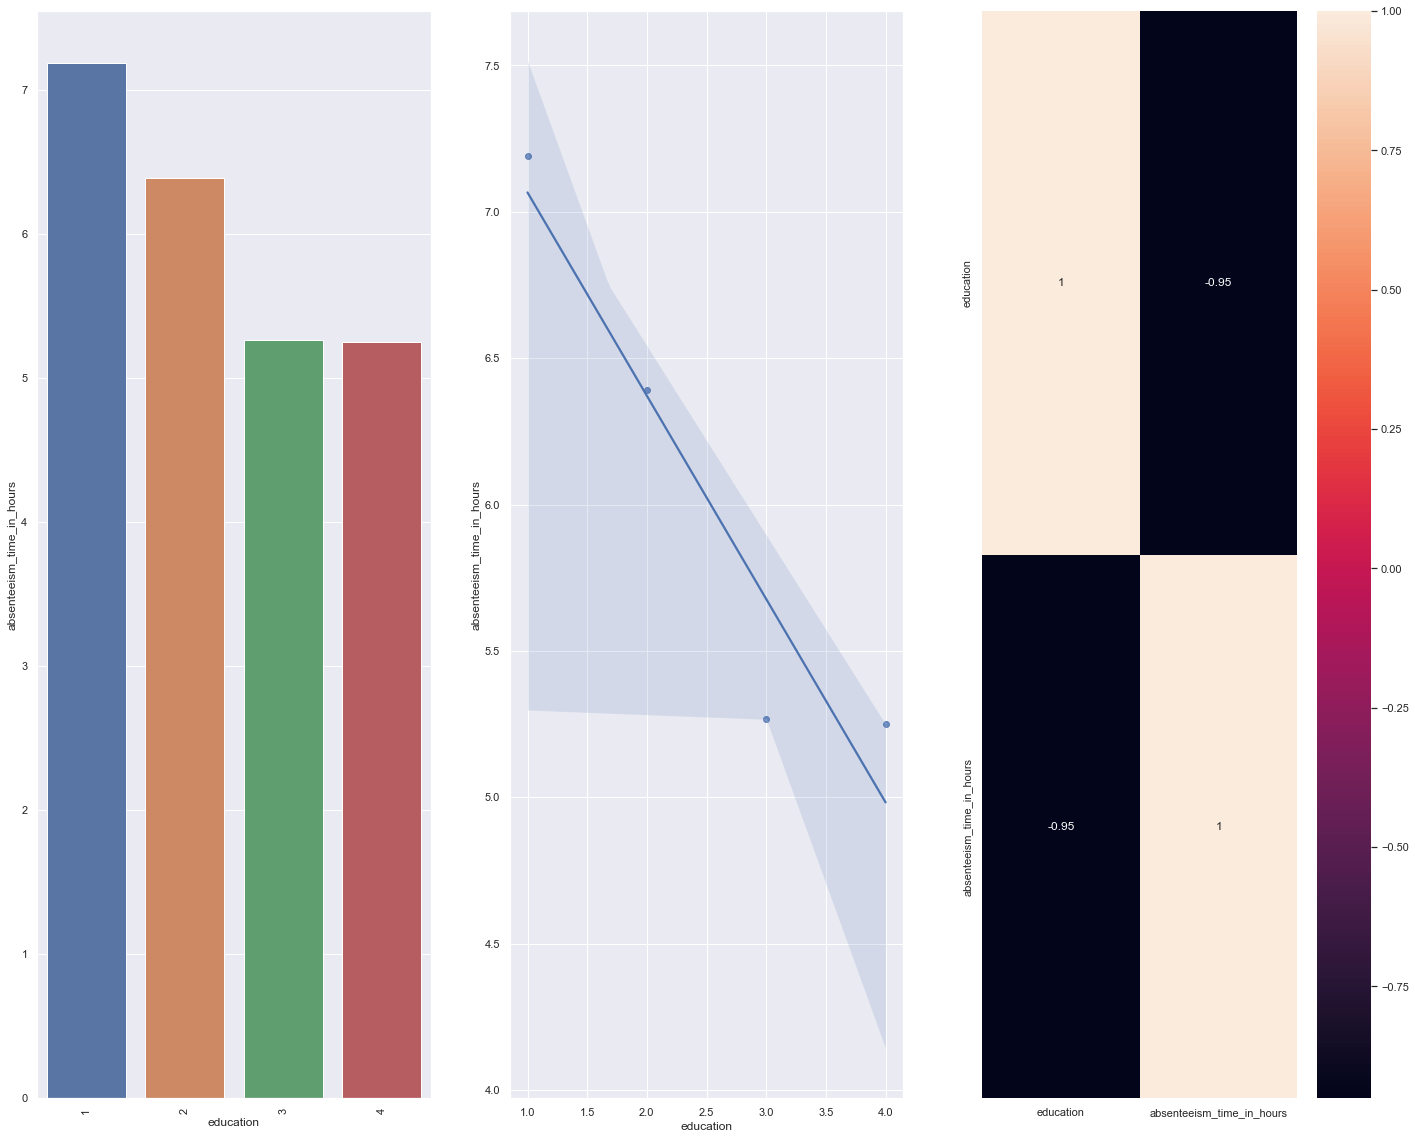

In [116]:
aux1 = df2[['absenteeism_time_in_hours', 'education']].groupby('education').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='education', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='education', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

## **H7.** The highest number of sons, more the absences.
**FALSE** The highest number of sons, less the absences.

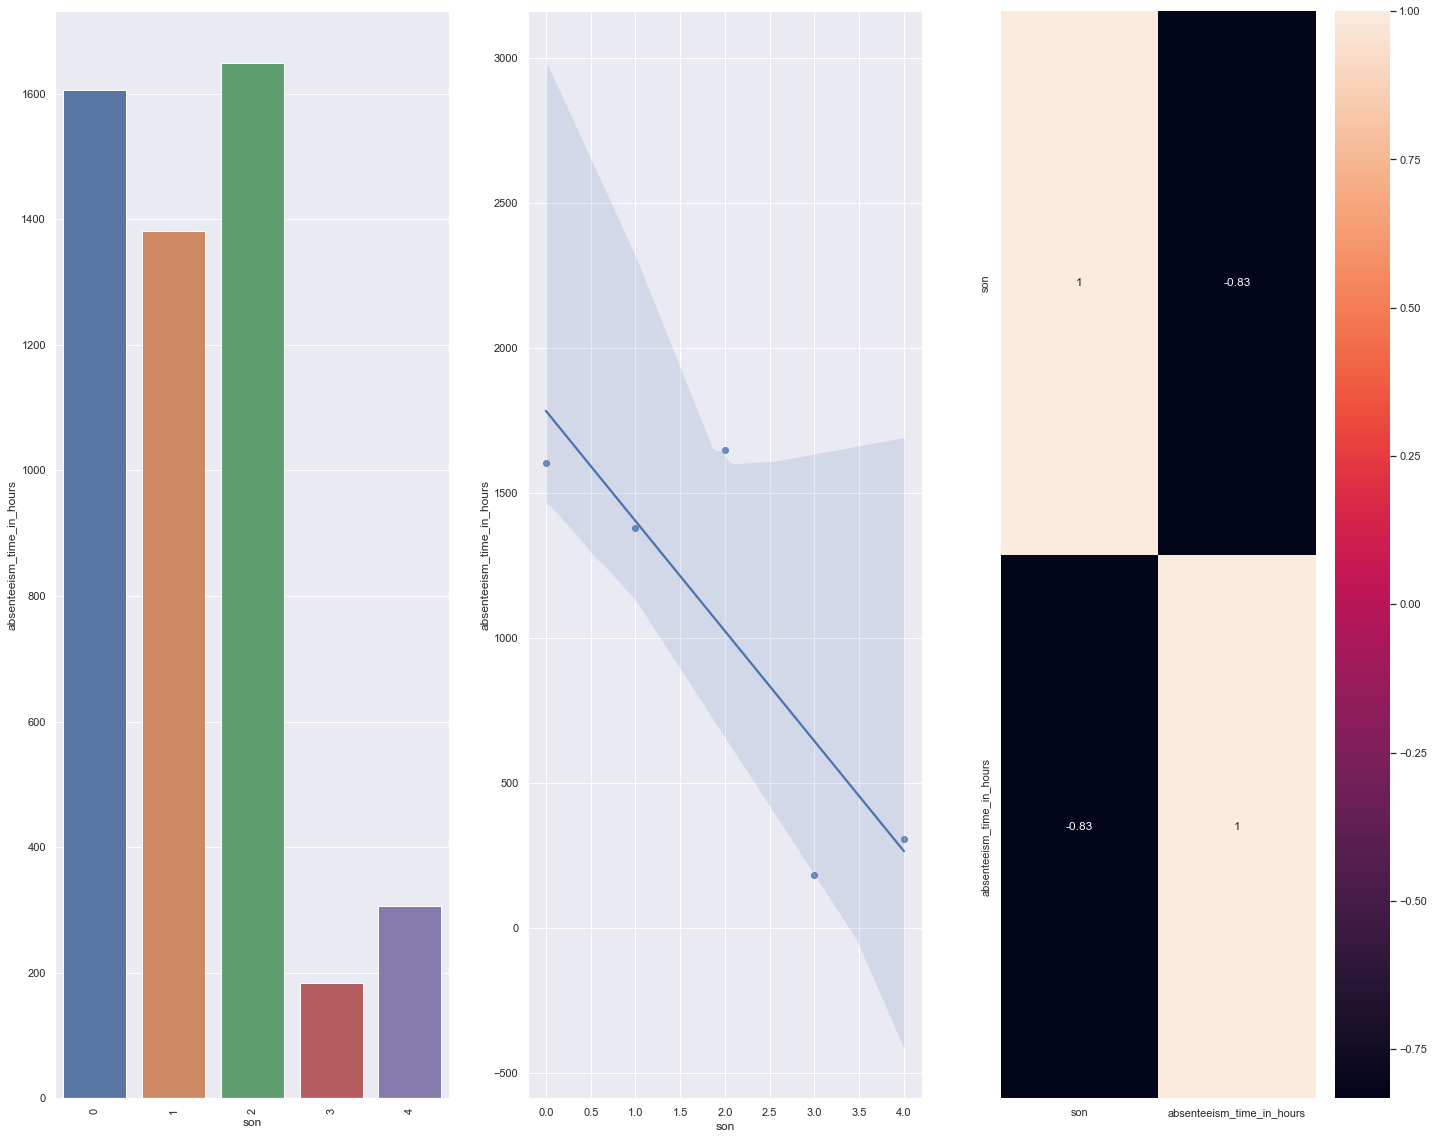

In [117]:
aux1 = df2[['absenteeism_time_in_hours', 'son']].groupby('son').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='son', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='son', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H8.** Employees who drink socially, plus absences.
**TRUE**Employees who drink socially, plus absences.

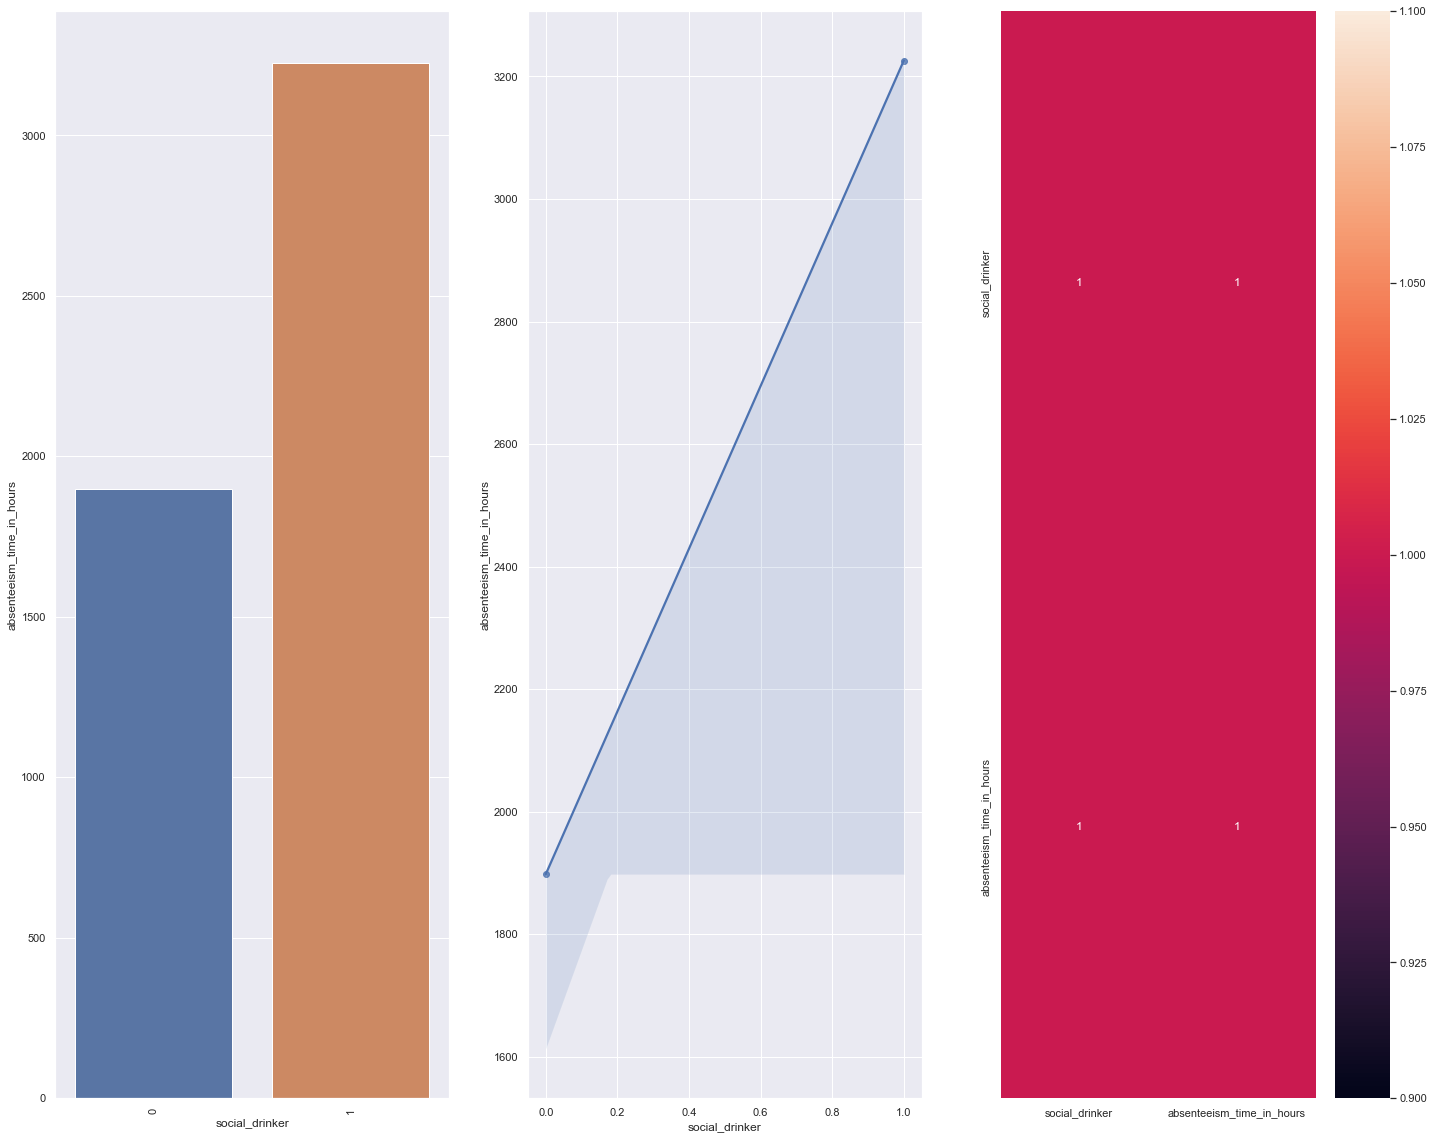

In [121]:
aux1 = df2[['absenteeism_time_in_hours', 'social_drinker']].groupby('social_drinker').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='social_drinker', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='social_drinker', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H9.** Employees who smokes socially, plus absences.
**FALSE** Employees who smokes socially, less the absences.

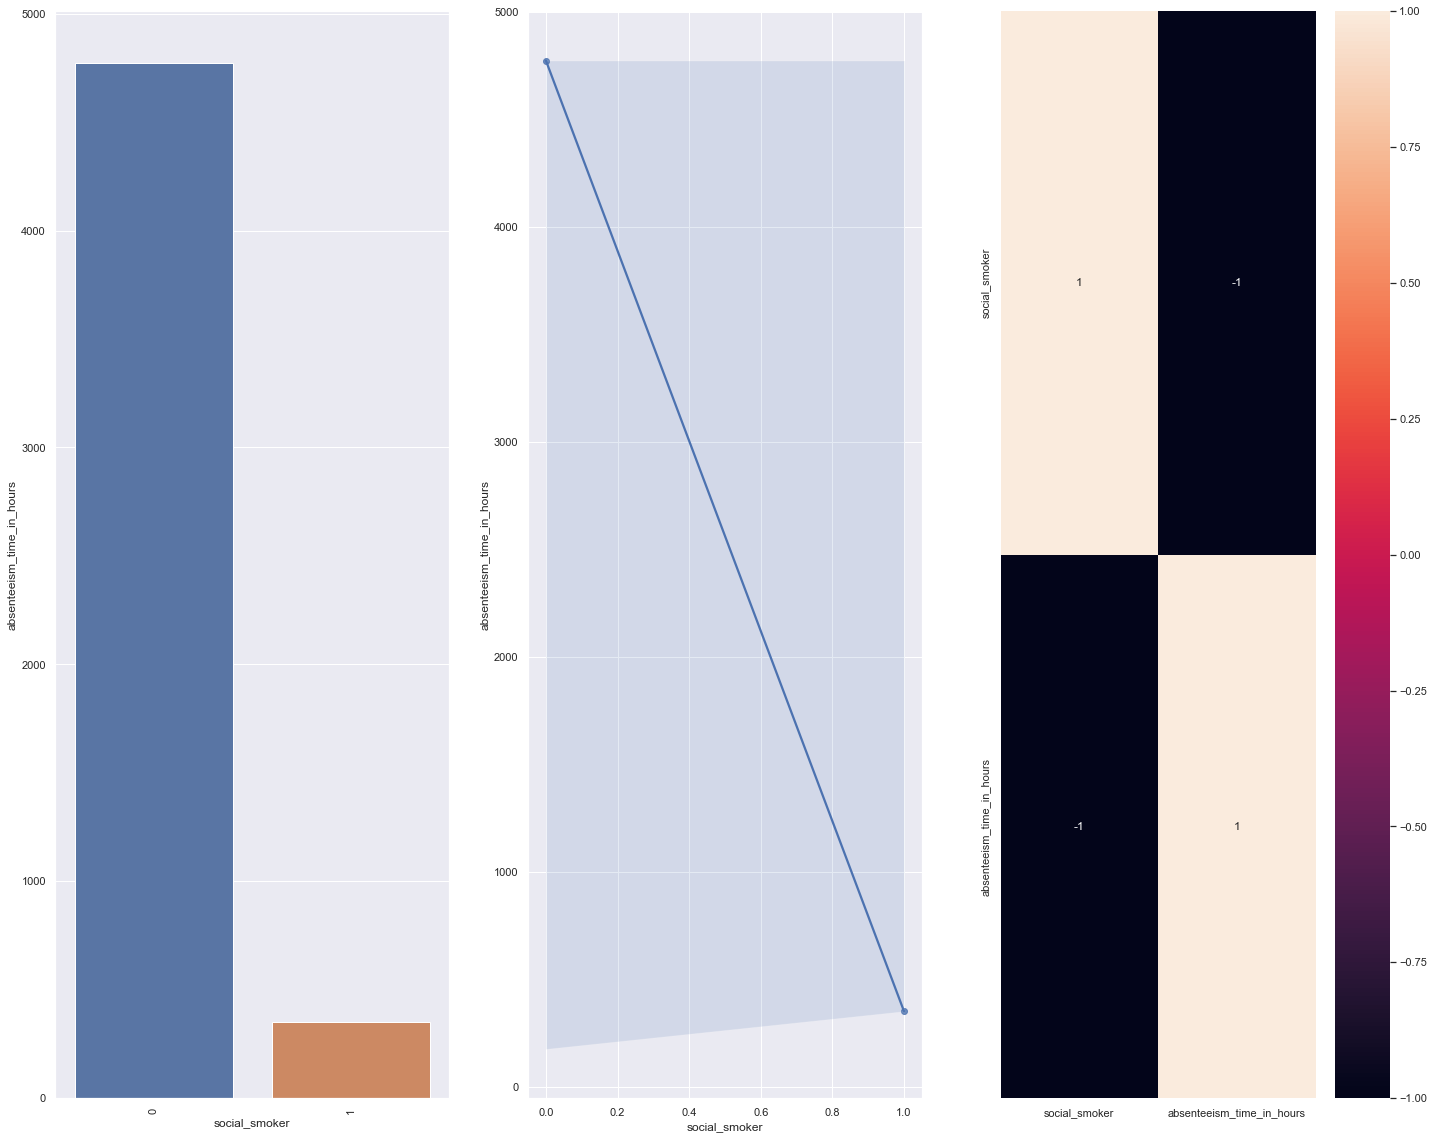

In [122]:
aux1 = df2[['absenteeism_time_in_hours', 'social_smoker']].groupby('social_smoker').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='social_smoker', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='social_smoker', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H10.** The lowest body mass index, more the adherence to work.
**FALSE** The lowest body mass index, more the absence.

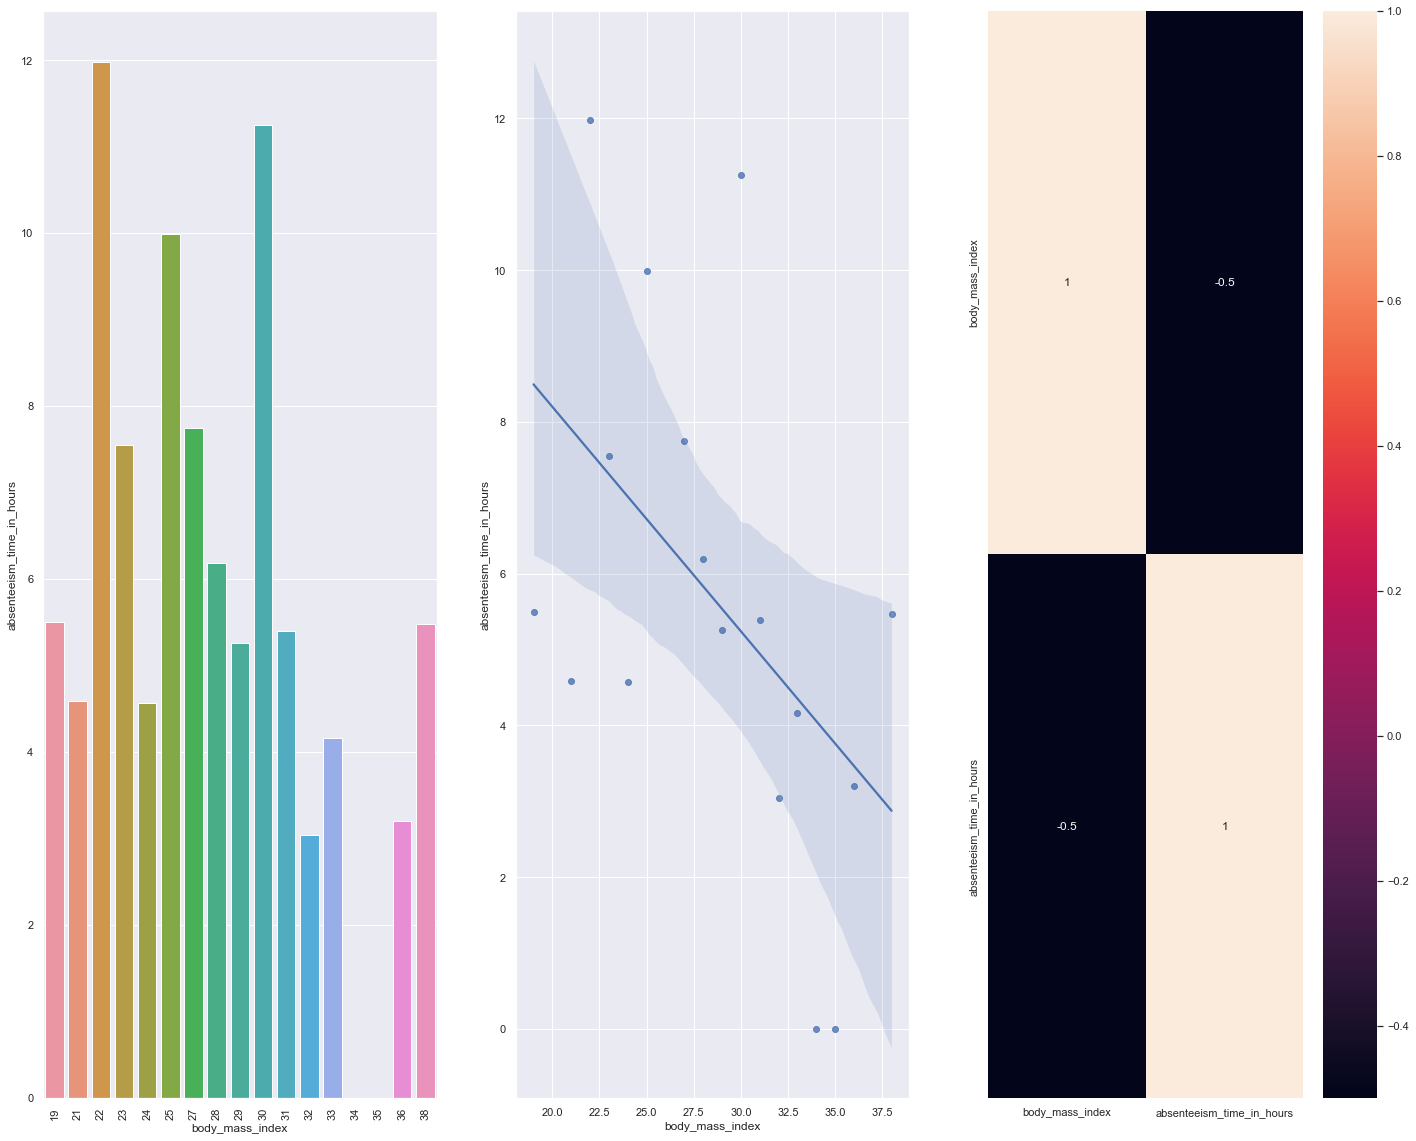

In [123]:
aux1 = df2[['absenteeism_time_in_hours', 'body_mass_index']].groupby('body_mass_index').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='body_mass_index', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='body_mass_index', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **H11.** The highest distance from residence to work, more the absences.
**FALSE** The highest distance from residence to work, less the absences.

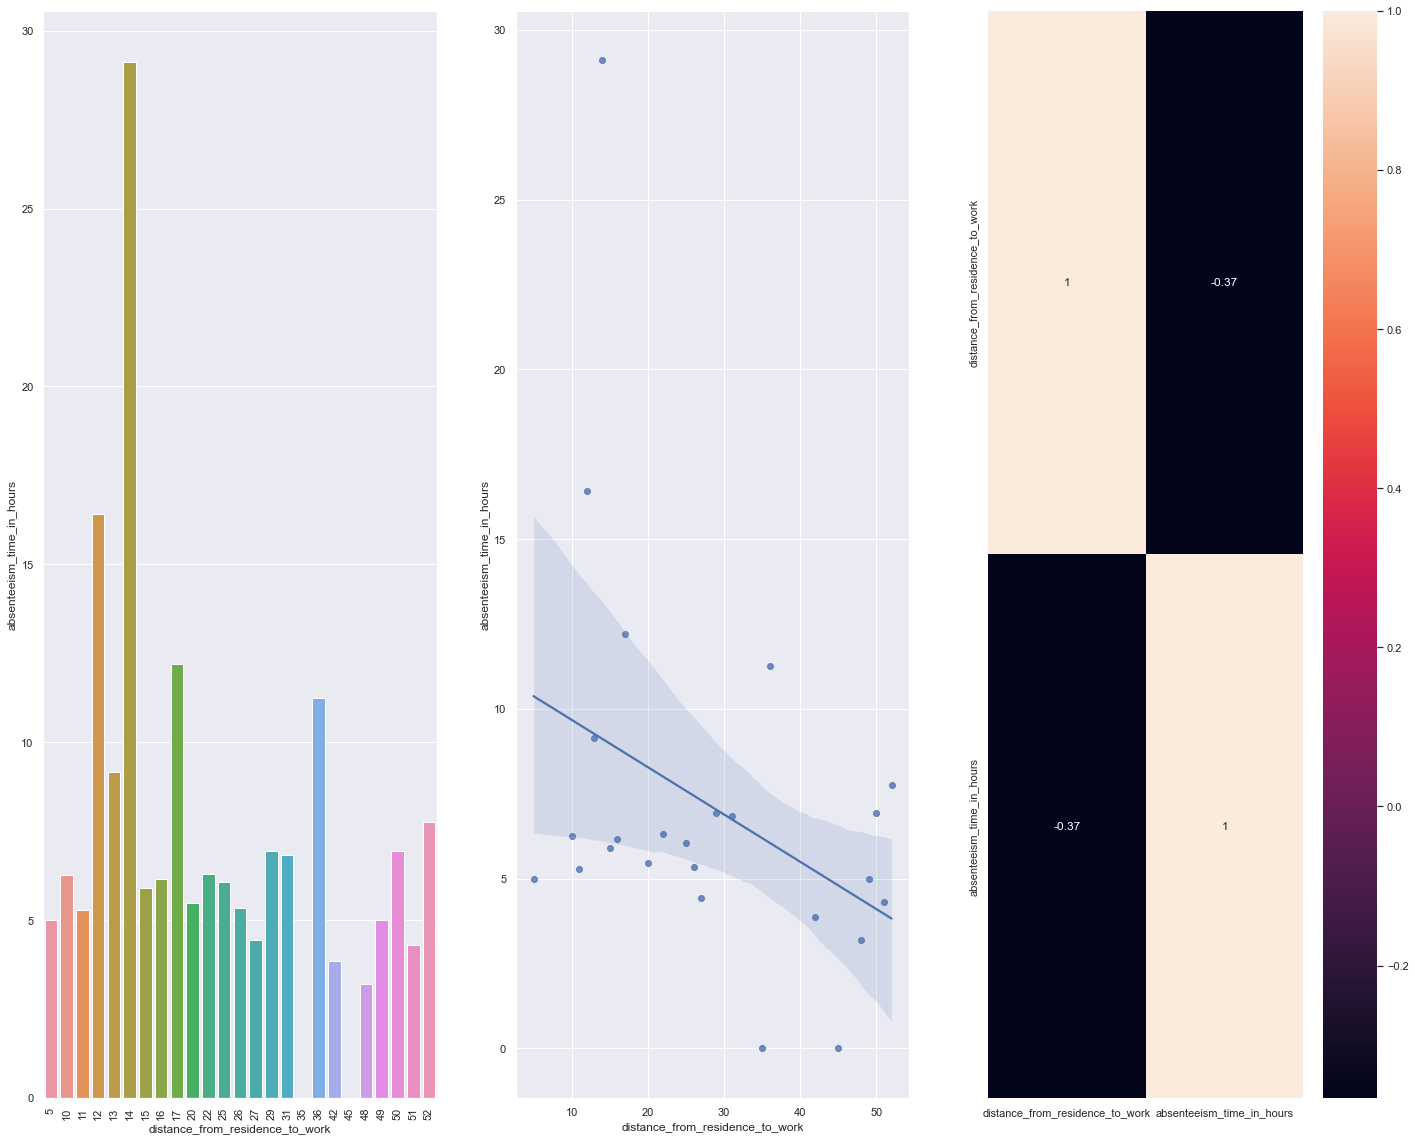

In [126]:
aux1 = df2[['absenteeism_time_in_hours', 'distance_from_residence_to_work']].groupby('distance_from_residence_to_work').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='distance_from_residence_to_work', y='absenteeism_time_in_hours', data=aux1);
xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot( x='distance_from_residence_to_work', y='absenteeism_time_in_hours', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

## 4.3 Analise Multivariada

### 4.3.1 Numerical Attributes

<AxesSubplot:>

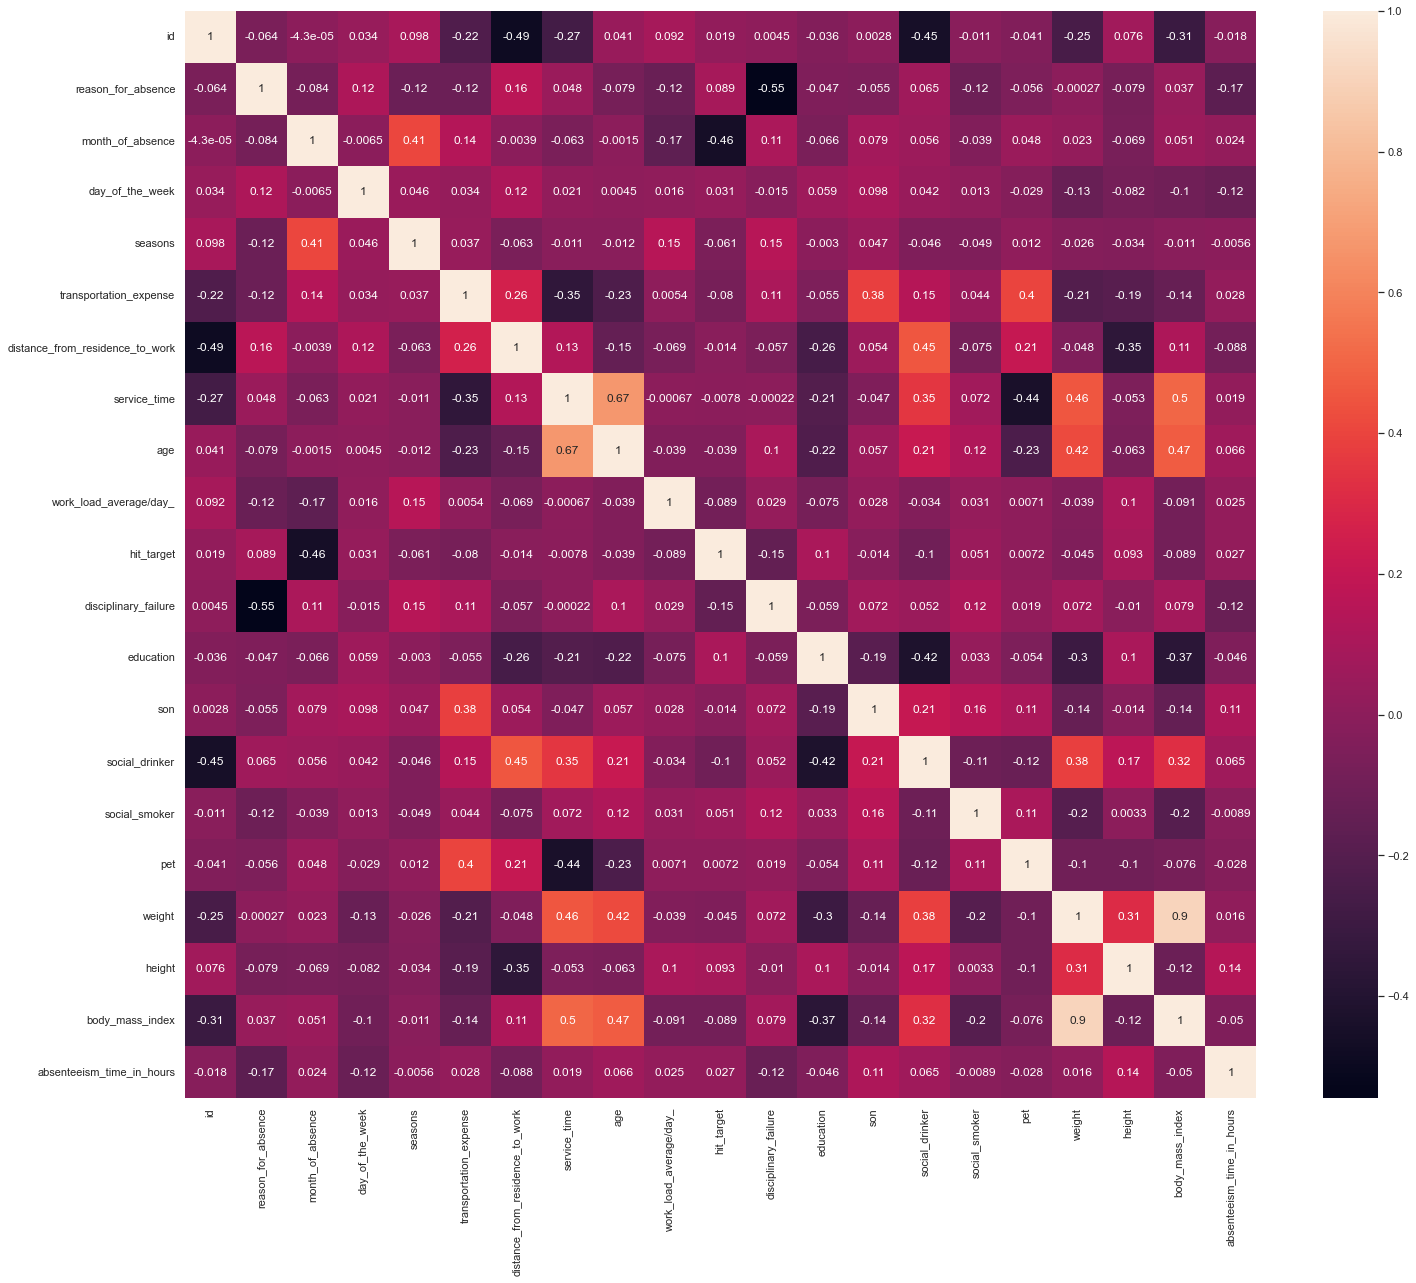

In [141]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True)

## 4.4 Resumo das Hipoteses

In [147]:
from tabulate import tabulate

headers = ['Hipothesis', 'Conclusion', 'Relevancy']
           
tab = [
    ['H1', 'False', 'High'],
    ['H2', 'False', 'High'],
    ['H3', 'True', 'High'],
    ['H4', 'False', 'Low'],
    ['H5', 'False', 'High'],
    ['H6', 'False', 'Low'],
    ['H7', 'False', 'Low'],
    ['H8', 'True', 'High'],
    ['H9', 'False', 'High'],
    ['H10', 'False', 'High'],
    ['H11', 'False', 'Medium'],
      ]
print( tabulate( tab, headers=headers, showindex="always"))

    Hipothesis    Conclusion    Relevancy
--  ------------  ------------  -----------
 0  H1            False         High
 1  H2            False         High
 2  H3            True          High
 3  H4            False         Low
 4  H5            False         High
 5  H6            False         Low
 6  H7            False         Low
 7  H8            True          High
 8  H9            False         High
 9  H10           False         High
10  H11           False         Medium
